In [1]:
# ok here we go
import torch
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from dvq.data.cifar10 import CIFAR10Data

class FakeArgs:
    pass
args = FakeArgs()
args.data_dir = '/apcv/users/akarpathy/cifar10'
args.batch_size = 16
args.num_workers = 0
args.loss_flavor = 'l2'

data_module = CIFAR10Data(args)
val_loader = data_module.val_dataloader()
x, y = next(iter(val_loader))

Files already downloaded and verified


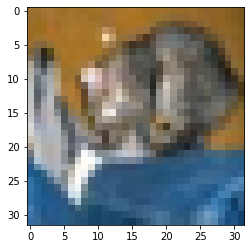

In [3]:
plt.imshow(x[0].permute(1, 2, 0) + 0.5)

In [4]:
from dvq.vqvae import VQVAE
args = FakeArgs()
args.vq_flavor = 'vqvae'
args.loss_flavor = 'l2'
args.enc_dec_flavor = 'deepmind'
args.n_hid = 64
args.embedding_dim = 64
args.num_embeddings = 512
model = VQVAE.load_from_checkpoint('/home/c2/src/deep-vector-quantization/lightning_logs/version_37_main_no_changes/checkpoints/epoch=96-step=37829.ckpt', args=args)

In [5]:
model.cuda()
x = x.cuda()

In [6]:
x_hat, latent_loss, ind = model(x)

In [7]:
xcols = torch.cat([x, x_hat], axis=2) # side by side x and xhat
xrows = torch.cat([xcols[i] for i in range(x.size(0))], axis=2)

(-0.5, 511.5, 63.5, -0.5)

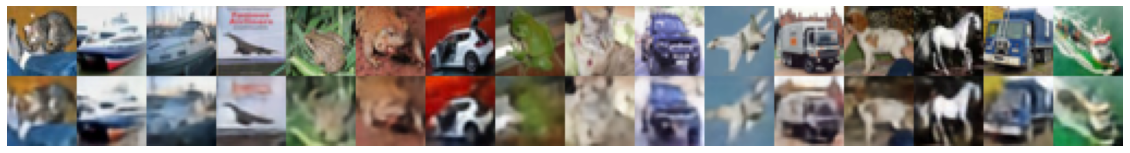

In [8]:
plt.figure(figsize=(20, 5))
plt.imshow((xrows.data.cpu().permute(1, 2, 0) + 0.5).clamp(0, 1))
plt.axis('off')

In [9]:
# ¯\_(ツ)_/¯
# expecting something like bottom of https://github.com/deepmind/sonnet/blob/v2/examples/vqvae_example.ipynb
# kinda? the raw reconstruction loss on validation data this model reports is lower